# CHALLENGE STATEMENT


# PART 1: Prepare Data

In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

%matplotlib inline
import matplotlib.pyplot as plt

# hola

In [2]:
data=pd.read_csv('BikeSharing_Bluebikes2022.csv')
data.set_index('starttime')

,Unnamed: 0,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code
starttime,,,,,,,,,,,,,,
2022-01-01 00:00:25.1660,0,597,2022-01-01 00:10:22.1920,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139
2022-01-01 00:00:40.4300,1,411,2022-01-01 00:07:32.1980,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139
2022-01-01 00:00:54.8180,2,476,2022-01-01 00:08:51.6680,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124
2022-01-01 00:01:01.6080,3,466,2022-01-01 00:08:48.2350,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124
2022-01-01 00:01:06.0520,4,752,2022-01-01 00:13:38.2300,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 23:59:44.9190,487196,591,2022-09-01 00:09:36.0490,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,-71.076793,6399,Subscriber,02139
2022-08-31 23:59:45.7290,487197,631,2022-09-01 00:10:17.2070,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,-71.100265,8075,Subscriber,NaN
2022-08-31 23:59:48.6080,487198,521,2022-09-01 00:08:30.3250,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,-71.068904,2880,Subscriber,02118


In [3]:
data.describe()

,Unnamed: 0,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid
count,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06,2.305735e+06
mean,1.786946e+05,1.677280e+03,1.969274e+02,4.235836e+01,-7.108997e+01,1.943029e+02,4.235826e+01,-7.108976e+01,5.160746e+03
std,1.231806e+05,2.396786e+04,1.665054e+02,1.874017e-02,2.841243e-02,1.659709e+02,1.882696e-02,2.848096e-02,1.752306e+03
min,0.000000e+00,6.100000e+01,1.000000e+00,4.216723e+01,-7.124776e+01,1.000000e+00,4.216723e+01,-7.124776e+01,2.180000e+02
25%,7.205400e+04,4.440000e+02,6.100000e+01,4.234836e+01,-7.110734e+01,6.000000e+01,4.234828e+01,-7.110729e+01,3.641000e+03
50%,1.601320e+05,7.520000e+02,1.250000e+02,4.235848e+01,-7.109051e+01,1.200000e+02,4.235810e+01,-7.109039e+01,5.254000e+03
75%,2.709610e+05,1.287000e+03,3.590000e+02,4.236707e+01,-7.107060e+01,3.570000e+02,4.236662e+01,-7.107060e+01,6.643000e+03
max,4.872000e+05,3.401096e+06,5.720000e+02,4.253467e+01,-7.087021e+01,5.720000e+02,4.253467e+01,-7.087021e+01,8.129000e+03


In [8]:
#STEP 1: Convert the columns 'starttime' and 'stoptime' in a datetime value
from datetime import datetime as dt

data['starttime'] = pd.to_datetime(data['starttime'], format='%Y-%m-%d %H:%M:%S')
data['stoptime'] = pd.to_datetime(data['stoptime'], format='%Y-%m-%d %H:%M:%S')

In [35]:
from datetime import datetime as dt

data['starttime2']=pd.Series(data['starttime']).dt.floor("H")
# data.assign(Date = lambda x: pd.to_datetime(data['starttime'], format='%Y-%m-%d %H'))
# data['stoptime2'] = data.assign(Date = lambda x: pd.to_datetime(data['stoptime'], format='%Y-%m-%d %H')

In [36]:
data

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,starttime2,stoptime2
0,0,597,2022-01-01 00:00:25.166,2022-01-01 00:10:22.192,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139,2022-01-01 00:00:00,2022-01-01 00:10:22.192
1,1,411,2022-01-01 00:00:40.430,2022-01-01 00:07:32.198,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139,2022-01-01 00:00:00,2022-01-01 00:07:32.198
2,2,476,2022-01-01 00:00:54.818,2022-01-01 00:08:51.668,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124,2022-01-01 00:00:00,2022-01-01 00:08:51.668
3,3,466,2022-01-01 00:01:01.608,2022-01-01 00:08:48.235,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124,2022-01-01 00:00:00,2022-01-01 00:08:48.235
4,4,752,2022-01-01 00:01:06.052,2022-01-01 00:13:38.230,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215,2022-01-01 00:00:00,2022-01-01 00:13:38.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305730,487196,591,2022-08-31 23:59:44.919,2022-09-01 00:09:36.049,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,-71.076793,6399,Subscriber,02139,2022-08-31 23:00:00,2022-09-01 00:09:36.049
2305731,487197,631,2022-08-31 23:59:45.729,2022-09-01 00:10:17.207,380,Mass Ave at Albany St,42.361358,-71.096703,381,Inman Square at Springfield St.,42.374267,-71.100265,8075,Subscriber,NaN,2022-08-31 23:00:00,2022-09-01 00:10:17.207
2305732,487198,521,2022-08-31 23:59:48.608,2022-09-01 00:08:30.325,150,State Street at Channel Center,42.344137,-71.052608,26,Washington St at Waltham St,42.341575,-71.068904,2880,Subscriber,02118,2022-08-31 23:00:00,2022-09-01 00:08:30.325
2305733,487199,5908,2022-08-31 23:59:58.665,2022-09-01 01:38:27.493,105,Lower Cambridgeport at Magazine St / Riverside Rd,42.357219,-71.113872,374,Tremont St at Hamilton Pl,42.356683,-71.061666,7690,Subscriber,NaN,2022-08-31 23:00:00,2022-09-01 01:38:27.493


In [31]:
#STEP 2: Split the data

split=int(len(data)*0.7)
x_train = data[data['starttime']<='2022-07-01']
x_test = data[data['starttime']>='2022-07-01']
# y_train = data[:split]
# y_test = data[split:]

In [32]:
x_train.set_index('starttime')

,Unnamed: 0,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,postal code,starttime2,stoptime2
starttime,,,,,,,,,,,,,,,,
2022-01-01 00:00:25.166,0,597,2022-01-01 00:10:22.192,178,MIT Pacific St at Purrington St,42.359573,-71.101295,74,Harvard Square at Mass Ave/ Dunster,42.373268,-71.118579,4923,Subscriber,02139,2022-01-01 00:00:00,2022-01-01 00:10:22.192
2022-01-01 00:00:40.430,1,411,2022-01-01 00:07:32.198,189,Kendall T,42.362428,-71.084955,178,MIT Pacific St at Purrington St,42.359573,-71.101295,3112,Subscriber,02139,2022-01-01 00:00:00,2022-01-01 00:07:32.198
2022-01-01 00:00:54.818,2,476,2022-01-01 00:08:51.668,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,6901,Customer,02124,2022-01-01 00:00:00,2022-01-01 00:08:51.668
2022-01-01 00:01:01.608,3,466,2022-01-01 00:08:48.235,94,Main St at Austin St,42.375603,-71.064608,356,Charlestown Navy Yard,42.374125,-71.054812,5214,Customer,02124,2022-01-01 00:01:00,2022-01-01 00:08:48.235
2022-01-01 00:01:06.052,4,752,2022-01-01 00:13:38.230,19,Park Dr at Buswell St,42.347241,-71.105301,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,-71.123831,2214,Subscriber,02215,2022-01-01 00:01:00,2022-01-01 00:13:38.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30 23:59:34.689,388526,994,2022-07-01 00:16:09.418,84,CambridgeSide Galleria - CambridgeSide PL at L...,42.367074,-71.076793,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,-71.100573,2590,Subscriber,02139,2022-06-30 23:59:00,2022-07-01 00:16:09.418
2022-06-30 23:59:35.002,388527,795,2022-07-01 00:12:50.376,441,Sullivan Square,42.384452,-71.075149,397,Broadway at Beacham St,42.398361,-71.063738,4679,Subscriber,02143,2022-06-30 23:59:00,2022-07-01 00:12:50.376
2022-06-30 23:59:37.082,388528,1466,2022-07-01 00:24:03.656,374,Tremont St at Hamilton Pl,42.356683,-71.061666,296,Farragut Rd at E. 6th St,42.333400,-71.024950,5765,Subscriber,02127,2022-06-30 23:59:00,2022-07-01 00:24:03.656


In [65]:
y=pd.DataFrame(data.groupby([data['starttime'].dt.month,data['starttime'].dt.day,data['starttime'].dt.hour]).starttime.count())

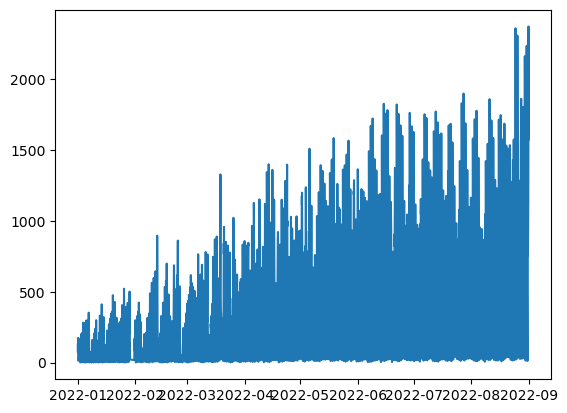

In [75]:
hours_starttime=data["starttime2"].unique()

In [71]:
y['Date']=hours_starttime

In [ ]:
plt.plot(y['Date'],y['starttime'])

In [76]:
y

starttime                Date
starttime starttime starttime                               
1         1         0                125 2022-01-01 00:00:00
                    1                 92 2022-01-01 01:00:00
                    2                 73 2022-01-01 02:00:00
                    3                 95 2022-01-01 03:00:00
                    4                 91 2022-01-01 04:00:00
...                                  ...                 ...
8         31        19              1403 2022-08-31 19:00:00
                    20              1661 2022-08-31 20:00:00
                    21              2370 2022-08-31 21:00:00
                    22              2106 2022-08-31 22:00:00
                    23              1575 2022-08-31 23:00:00

[5773 rows x 2 columns]

In [63]:
dic = {}
for i in range len(y):
    

starttime  starttime
1          0            125
           1             92
           2             73
           3             95
           4             91
                       ... 
31         19           155
           20           168
           21           227
           22           298
           23           232
Name: starttime, Length: 689, dtype: int64

In [45]:
df_pickups = pd.DataFrame(y, columns=[hours_starttime'])

In [46]:
df_pickups

,hours_starttime


# PART 2: Prediction Challenge

# PART 3: Exploratory component